In [1]:
from pathlib import Path
import pandas as pd

filePath = Path.cwd().parent / 'Datasets' / 'PositiveDataset.csv'
df = pd.read_csv(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  1421 non-null   int64 
 1   Unnamed: 0    1421 non-null   int64 
 2   Reviews       1421 non-null   object
 3   Mood          1421 non-null   object
dtypes: int64(2), object(2)
memory usage: 44.5+ KB


In [3]:
df = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])
df.head()

,Reviews,Mood
0,"Confidently directed, dark, brooding, and pack...",Positive
1,Best movie ever. Heath ledger's work is phenom...,Positive
2,This movie is a work of art. The finest sequel...,Positive
3,It is just what you want for the best movie. G...,Positive
4,We've been subjected to enormous amounts of hy...,Positive


In [5]:
import re
df.Reviews = df['Reviews'].apply(lambda text: re.sub(r'[^a-zA-Z\s]', '', text))
df.head()

,Reviews,Mood
0,Confidently directed dark brooding and packed ...,Positive
1,Best movie ever Heath ledgers work is phenomen...,Positive
2,This movie is a work of art The finest sequel ...,Positive
3,It is just what you want for the best movie Gr...,Positive
4,Weve been subjected to enormous amounts of hyp...,Positive


<Axes: xlabel='Reviews', ylabel='Count'>

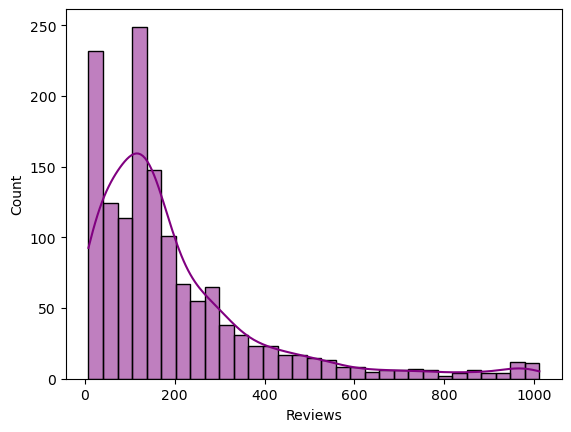

In [7]:
import seaborn as sns
sns.histplot(df['Reviews'].apply(lambda text: len(text.split())), kde = True, color = 'purple')

<Axes: xlabel='Reviews', ylabel='Count'>

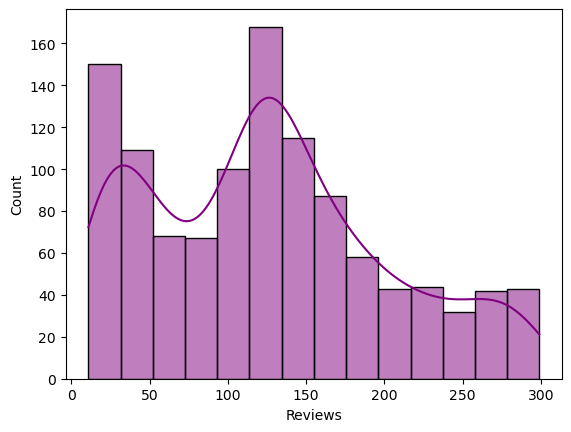

In [29]:
df_ = df[(df.Reviews.str.split().str.len() > 10) & (df.Reviews.str.split().str.len() < 300)]
sns.histplot(df_['Reviews'].apply(lambda text: len(text.split())), kde = True, color = 'purple')

In [31]:
len(df_.index)

1126

In [33]:
filePath2 = Path.cwd().parent / 'PreprocessedData' / 'PositiveDataset.csv'
df_.to_csv(filePath2, index = False)